# Data Exploration

In [1]:
import numpy as np
import pandas as pd


processed_data = pd.read_csv("COMPLETE.csv")
processed_data.columns=["UID","Url","Title of Repo","Owner of Repo","Has wiki","Open issues","Stars","Size of Repo","Forks","Description","Topics"]
processed_data["Topics"] = processed_data["Topics"].fillna("")
processed_data["Description"] = processed_data["Description"].fillna("")
processed_data.head()

,UID,Url,Title of Repo,Owner of Repo,Has wiki,Open issues,Stars,Size of Repo,Forks,Description,Topics
0,7508411,https://api.github.com/repos/ReactiveX/RxJava,RxJava,ReactiveX,True,33,27281,43606,4807,RxJava Reactive Extensions for the JVM a lib...,flow java reactive-streams rxjava
1,507775,https://api.github.com/repos/elastic/elasticse...,elasticsearch,elastic,False,1316,25152,369287,8890,"Open Source, Distributed, RESTful Search Engine",elasticsearch java search-engine
2,22790488,https://api.github.com/repos/iluwatar/java-des...,java-design-patterns,iluwatar,True,173,24353,16112,7796,Design patterns implemented in Java,design-patterns java principles
3,892275,https://api.github.com/repos/square/retrofit,retrofit,square,True,71,23848,4522,4809,Type-safe HTTP client for Android and Java by ...,
4,5152285,https://api.github.com/repos/square/okhttp,okhttp,square,True,114,22387,16379,5405,An HTTP+HTTP/2 client for Android and Java app...,


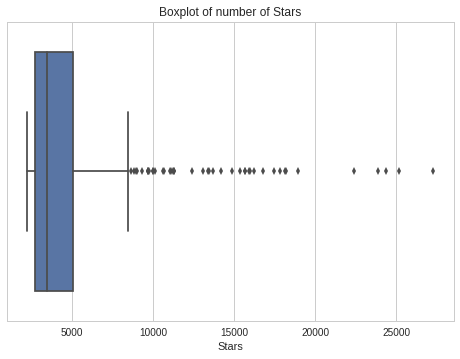

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
plt.title("Boxplot of number of Stars")
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=2,ncols=2,sharex=True)
sns.boxplot(x=processed_data["Stars"])


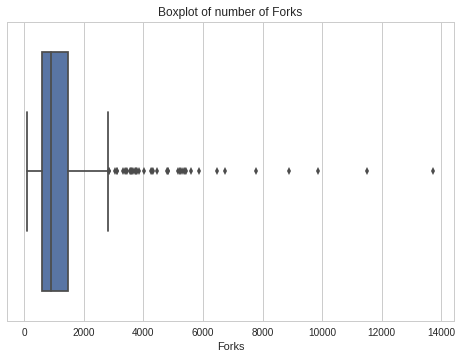

In [3]:
plt.title("Boxplot of number of Forks")
sns.boxplot(x=processed_data["Forks"])

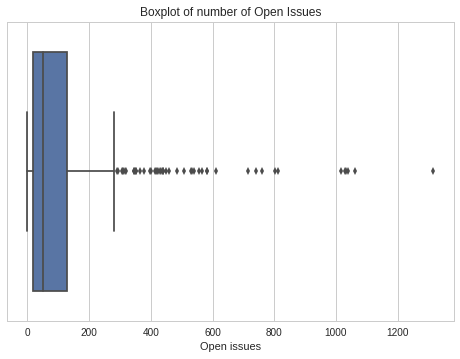

In [4]:
plt.title("Boxplot of number of Open Issues")
sns.boxplot(x=processed_data["Open issues"])

In [ ]:
new_df=processed_data.sort_values(["Size of Repo"],ascending=True).reset_index()
sns.regplot(np.array([i for i in range(500)]),new_df["Size of Repo"])
#ax.set(xlabel="",ylabel="Number of Topics")

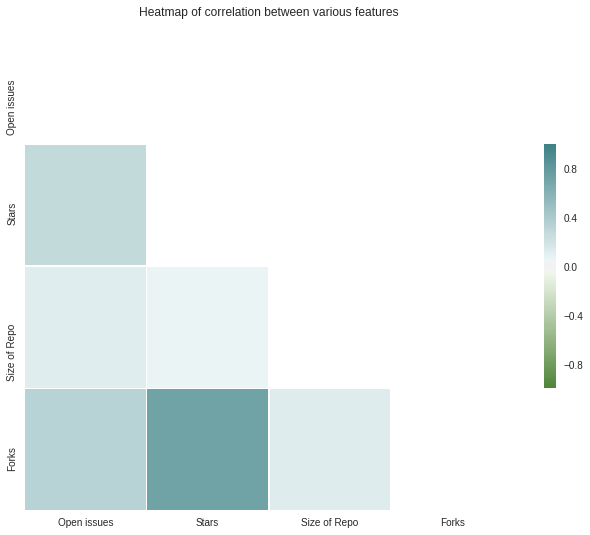

In [5]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = processed_data[['Open issues','Stars','Size of Repo','Forks']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 200, as_cmap=True)

plt.title("Heatmap of correlation between various features")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


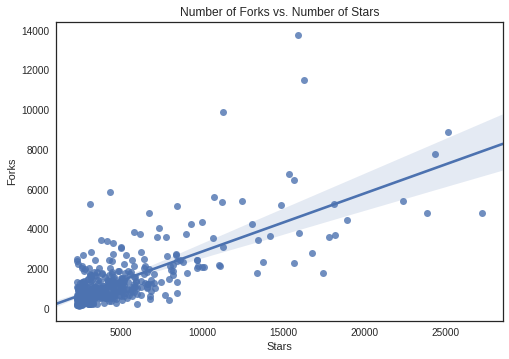

In [8]:
plt.title("Number of Forks vs. Number of Stars")
sns.regplot(processed_data["Stars"],processed_data["Forks"])

In [10]:
df = pd.read_csv("topic_nos.csv")
df.columns=["Topic","Number"]
df["Number"] = df["Number"].fillna(0)
df.head()

,Topic,Number
0,elasticsearch java search-engine,3.0
1,design-patterns java principles,3.0
2,0,0.0
3,0,0.0
4,0,0.0


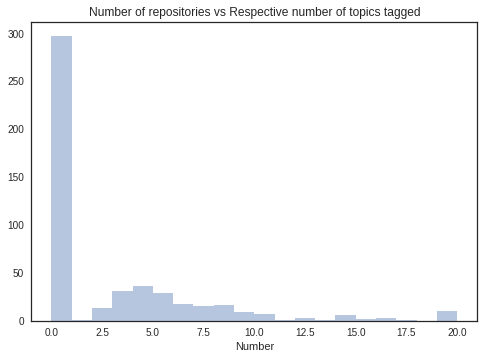

In [11]:
plt.title("Number of repositories vs Respective number of topics tagged")
sns.distplot(df["Number"],kde=False)

[]

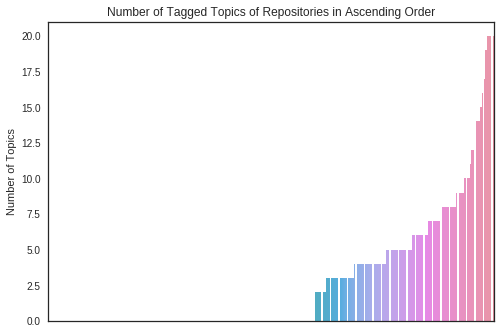

In [12]:
new_df=df.sort_values(["Number"],ascending=True).reset_index()
plt.title("Number of Tagged Topics of Repositories in Ascending Order")
ax=sns.barplot(new_df.index,new_df["Number"])
ax.set(xlabel="",ylabel="Number of Topics")
ax.get_xaxis().set_ticks([])


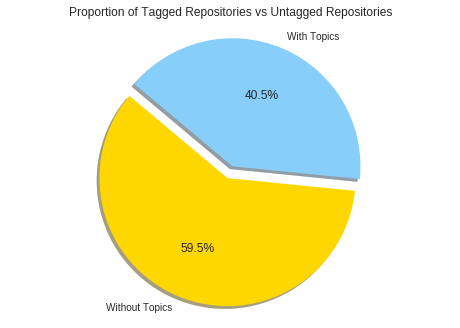

In [13]:
labels = "Without Topics","With Topics"
sizes = [len(df[df["Number"]==0]), len(df[df["Number"]>0])]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.title("Proportion of Tagged Repositories vs Untagged Repositories")
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()